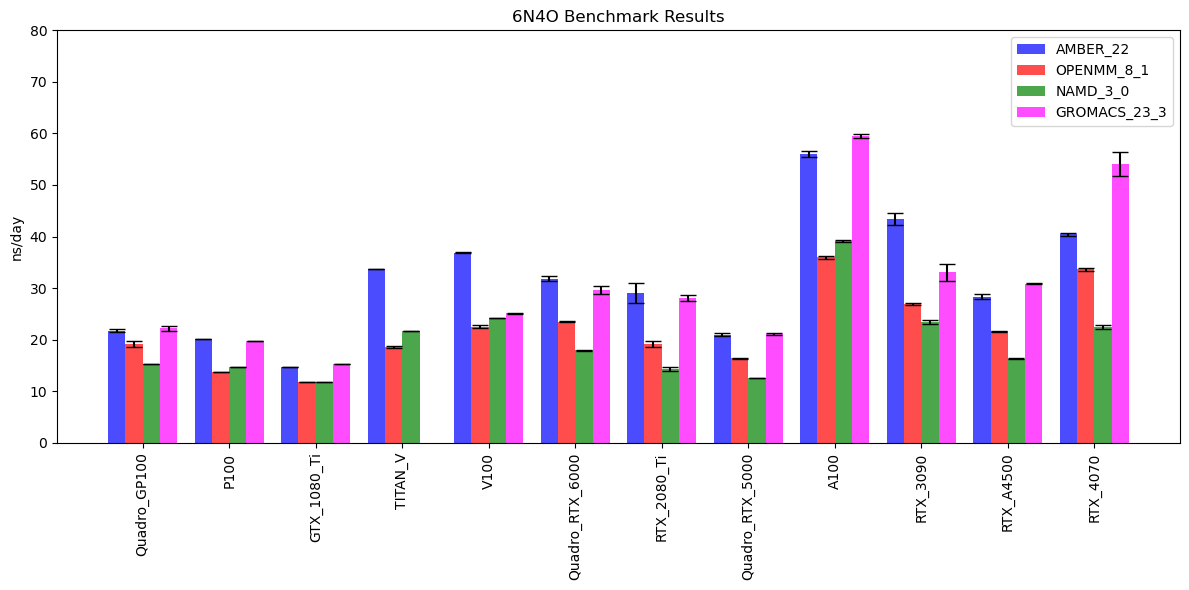

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of file names for Amber and OpenMM
amber_filenames = [
    '../AMBER-benchmark/benchmark_6n4o_pmemd/sylvaner/GTX_1080_Ti_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/case/TITAN_V_results_amber.dat',
    #'../AMBER-benchmark/benchmark_6n4o_pmemd/case/RTX_5000_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/cerebro/RTX_6000_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/cerebro/GP100_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/cerebro/RTX_2080_Ti_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/rioja/RTX_3090_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/rioja/RTX_5000_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/rioja/RTX_A4500_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/tesla/RTX_4070_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/amarel/A100_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/amarel/P100_results_amber.dat',
    #'../AMBER-benchmark/benchmark_6n4o_pmemd/amarel/rtx_2080_ti_results_amber.dat',
    # '../AMBER-benchmark/benchmark_6n4o_pmemd/amarel/rtx_3090_results_amber.dat',
    '../AMBER-benchmark/benchmark_6n4o_pmemd/amarel/V100_results_amber.dat'    
]

openmm_filenames = [
    '../OPENMM-benchmark/benchmark_6n4o_openmm/sylvaner/GTX_1080_Ti_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/case/TITAN_V_results_openmm.dat',
    #'../OPENMM-benchmark/benchmark_6n4o_openmm/case/Quadro_RTX_5000_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/cerebro/RTX_6000_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/cerebro/GP100_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/cerebro/RTX_2080_Ti_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/rioja/RTX_3090_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/rioja/RTX_5000_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/rioja/RTX_A4500_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/tesla/RTX_4070_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/amarel/A100_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/amarel/P100_results_openmm.dat',
    #'../OPENMM-benchmark/benchmark_6n4o_openmm/amarel/RTX_2080_ti_results_openmm.dat',
    # '../OPENMM-benchmark/benchmark_6n4o_openmm/amarel/RTX_3090_results_openmm.dat',
    '../OPENMM-benchmark/benchmark_6n4o_openmm/amarel/V100_results_openmm.dat'  
]

namd_filenames = [
    '../NAMD-benchmark/benchmark_6n4o_namd/sylvaner/GTX_1080_Ti_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/case/TITAN_V_results_namd.dat',
    #'../NAMD-benchmark/benchmark_6n4o_namd/case/Quadro_RTX_5000_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/cerebro/RTX_6000_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/cerebro/GP100_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/cerebro/RTX_2080_Ti_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/rioja/RTX_3090_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/rioja/RTX_5000_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/rioja/RTX_A4500_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/tesla/RTX_4070_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/amarel/A100_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/amarel/P100_results_namd.dat',
    #'../NAMD-benchmark/benchmark_6n4o_namd/amarel/RTX_2080_ti_results_namd.dat',
    # '../NAMD-benchmark/benchmark_6n4o_openmm/amarel/RTX_3090_results_namd.dat',
    '../NAMD-benchmark/benchmark_6n4o_namd/amarel/V100_results_namd.dat'  
]

gromacs_filenames = [
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/sylvaner/GTX_1080_Ti_results_gromacs_4.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/case/TITAN_V_results_gromacs.dat',
    #'../GROMACS-benchmark/benchmark_6n4o_gromacs/case/Quadro_RTX_5000_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/cerebro/RTX_6000_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/cerebro/GP100_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/cerebro/RTX_2080_Ti_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/rioja/RTX_3090_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/rioja/RTX_5000_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/rioja/RTX_A4500_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/tesla/RTX_4070_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/amarel/A100_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/amarel/P100_results_gromacs.dat',
    #'../GROMACS-benchmark/benchmark_6n4o_gromacs/amarel/RTX_2080_Ti_results_gromacs.dat',
    # '../GROMACS-benchmark/benchmark_6n4o_gromacs/amarel/RTX_3090_results_gromacs.dat',
    '../GROMACS-benchmark/benchmark_6n4o_gromacs/amarel/V100_results_gromacs.dat'  
    
]

device = [
    'GTX_1080_Ti', 'TITAN_V', 'Quadro_RTX_6000', 'Quadro_GP100',
    'RTX_2080_Ti', 'RTX_3090', 'Quadro_RTX_5000', 'RTX_A4500', 'RTX_4070',
    'A100','P100',#'RTX_2080_Ti',#'RTX_3090',
    'V100'
]


# Existing code for filenames and device names...

# CUDA compatibility scores for each device
cuda_scores = {
    'GTX_1080_Ti': 6.1, 'TITAN_V': 7.0, 'Quadro_RTX_5000': 7.5, 
    'Quadro_RTX_6000': 7.5, 'Quadro_GP100': 6.0, 'RTX_2080_Ti': 7.5, 
    'RTX_3090': 8.6, 'RTX_A4500': 8.6, 'RTX_4070': 9.0, # Anticipated score for RTX_4070
    'A100': 8.0, 'P100': 6.0, 'V100': 7.0
}


# Initialize lists to hold the averages and standard deviations for Amber, OpenMM, NAMD, and GROMACS
amber_averages = []
amber_standard_deviations = []
openmm_averages = []
openmm_standard_deviations = []
namd_averages = []
namd_standard_deviations = []
gromacs_averages = []
gromacs_standard_deviations = []

# Loop through each file, calculate the average and standard deviation of the second column for Amber
for file in amber_filenames:
    # Check if file exists
    if not os.path.isfile(file):
        print(f"File {file} not found.")
        continue

    # Read the data from the file
    data = pd.read_csv(file, sep='\s+', header=None)
    second_column = data.iloc[:, 0]

    # Calculate average and standard deviation and append to Amber lists
    amber_averages.append(second_column.mean())
    amber_standard_deviations.append(second_column.std())

# Loop through each file, calculate the average and standard deviation of the second column for OpenMM
for file in openmm_filenames:
    # Check if file exists
    if not os.path.isfile(file):
        print(f"File {file} not found.")
        continue

    # Read the data from the file
    data = pd.read_csv(file, sep='\s+', header=None)
    second_column = data.iloc[:, 0]

    # Calculate average and standard deviation and append to OpenMM lists
    openmm_averages.append(second_column.mean())
    openmm_standard_deviations.append(second_column.std())

# Loop through each file, calculate the average and standard deviation of the second column for NAMD
for file in namd_filenames:
    # Check if file exists
    if not os.path.isfile(file):
        print(f"File {file} not found.")
        continue

    # Read the data from the file
    data = pd.read_csv(file, sep='\s+', header=None)
    second_column = data.iloc[:, 0]

    # Calculate average and standard deviation and append to NAMD lists
    namd_averages.append(second_column.mean())
    namd_standard_deviations.append(second_column.std())

# Loop through each file, calculate the average and standard deviation of the second column for GROMACS
for file in gromacs_filenames:
    # Check if file exists
    if not os.path.isfile(file):
        print(f"File {file} not found.")
        continue

    # Read the data from the file
    data = pd.read_csv(file, sep='\s+', header=None)
    second_column = data.iloc[:, 0]

    # Calculate average and standard deviation and append to GROMACS lists
    gromacs_averages.append(second_column.mean())
    gromacs_standard_deviations.append(second_column.std())

# # Sort the data based on the increasing order of amber_averages
# sorted_indices = np.argsort(amber_averages)
# device = [device[i] for i in sorted_indices]
# amber_averages = [amber_averages[i] for i in sorted_indices]
# amber_standard_deviations = [amber_standard_deviations[i] for i in sorted_indices]
# openmm_averages = [openmm_averages[i] for i in sorted_indices]
# openmm_standard_deviations = [openmm_standard_deviations[i] for i in sorted_indices]
# namd_averages = [namd_averages[i] for i in sorted_indices]
# namd_standard_deviations = [namd_standard_deviations[i] for i in sorted_indices]
# gromacs_averages = [gromacs_averages[i] for i in sorted_indices]
# gromacs_standard_deviations = [gromacs_standard_deviations[i] for i in sorted_indices]


# # Sorting the data based on the CUDA compatibility score
# sorted_indices = np.argsort([cuda_compat[d] for d in device])
# device_sorted = [device[i] for i in sorted_indices]
# amber_averages_sorted = [amber_averages[i] for i in sorted_indices]
# amber_std_sorted = [amber_standard_deviations[i] for i in sorted_indices]
# openmm_averages_sorted = [openmm_averages[i] for i in sorted_indices]
# openmm_std_sorted = [openmm_standard_deviations[i] for i in sorted_indices]
# namd_averages_sorted = [namd_averages[i] for i in sorted_indices]
# namd_std_sorted = [namd_standard_deviations[i] for i in sorted_indices]
# gromacs_averages_sorted = [gromacs_averages[i] for i in sorted_indices]
# gromacs_std_sorted = [gromacs_standard_deviations[i] for i in sorted_indices]


# Sort the data based on the increasing order of CUDA compatibility scores
sorted_indices = sorted(range(len(device)), key=lambda i: cuda_scores[device[i]])
device = [device[i] for i in sorted_indices]
amber_averages = [amber_averages[i] for i in sorted_indices]
amber_standard_deviations = [amber_standard_deviations[i] for i in sorted_indices]
openmm_averages = [openmm_averages[i] for i in sorted_indices]
openmm_standard_deviations = [openmm_standard_deviations[i] for i in sorted_indices]
namd_averages = [namd_averages[i] for i in sorted_indices]
namd_standard_deviations = [namd_standard_deviations[i] for i in sorted_indices]
gromacs_averages = [gromacs_averages[i] for i in sorted_indices]
gromacs_standard_deviations = [gromacs_standard_deviations[i] for i in sorted_indices]

# Create a single figure and plot data on the same plot
x_positions = np.arange(len(device))
width = 0.20

fig, ax = plt.subplots(figsize=(12, 6))
amber_bars = ax.bar(x_positions, amber_averages, width, label='AMBER_22', yerr=amber_standard_deviations, alpha=0.7, ecolor='black', capsize=6, color="blue")
openmm_bars = ax.bar(x_positions + width, openmm_averages, width, label='OPENMM_8_1', yerr=openmm_standard_deviations, alpha=0.7, ecolor='black', capsize=6, color="red")
namd_bars = ax.bar(x_positions + 2 * width, namd_averages, width, label='NAMD_3_0', yerr=namd_standard_deviations, alpha=0.7, ecolor='black', capsize=6, color="green")
gromacs_bars = ax.bar(x_positions + 3 * width, gromacs_averages, width, label='GROMACS_23_3', yerr=gromacs_standard_deviations, alpha=0.7, ecolor='black', capsize=6, color="magenta")

# print (amber_averages)
# print (amber_standard_deviations)

# print (namd_averages)
# print (namd_standard_deviations)

# print (gromacs_averages)
# print (gromacs_standard_deviations)

# print (openmm_averages)
# print (openmm_standard_deviations)

# Add labels and titles
ax.set_ylabel('ns/day')
ax.set_title('6N4O Benchmark c-MD Results')
ax.set_xticks(x_positions + 1.5 * width)
ax.set_xticklabels(device, rotation="vertical")
ax.set_yticks(np.arange(0, 81, 10))
ax.set_ylim(top=80, bottom=0)
ax.legend()

# Save the combined plot
plt.tight_layout()
plt.savefig('combined_benchmarks.jpg', dpi=450, bbox_inches='tight')

# Display the plot
plt.show()
